# Study of  world population distribution among continents  and how changed over decades 


#                              <h3>Project Proposal</h3>

# <h2>1 Aims, objectives </h2>

# <h3>1.1 Introduction</h3>
<p> over the last few decades-starting from 1980-  many revolutions, pandemics, and mother major events  hit the world. They may changed  the immigration among different countries and therefore, changed the crowdness of every country, in other words, shaping our current population.</p>
   
<p> Due to difficulty to study every country of  known 200 countries i decided to group them by continent for generalization and to be more handy</p>
   
<p> here, i study and examin this data set to observe the patterns of change and catching trends if there any current trend ex:- continent that shrinking in population count that may extinct in near future</p> 


# <h3>1.2 Aims and objectives</h3>

<p>Within this project, I would like to explore the following: </p>
<ul>
    <li> measuring total population of every continent</li>
    <li> measuring the density; how many people per one kilmoeter square</li>
</ul>


#  <h3>1.3Data</h3>

<h4>1.3.1 Data requirements:</h4>
<p> for this project i have  screened many websites to find reliable data that contains the following :-
    <ul>
        <li>Continents</li>
        <li>almost all countries</li>
        <li>sufficient  data for previous decades </li>
        <li> area of every country; honestly that was a plus point as never expected to have it</li>
    </ul>
        </p>
        
        



<h3>1.3.1 Limitations and constraints of the data</h3>
 <p>  this data may contain errors  for the following reasons 
    <ul>
        <li> some countries were under colonization and have no reliable record</li>
        <li> some countries consider their total population as national security issue. Therefore, they release rough estimation</li>
        <li>dataset is collected from open sources and may affected a little by author`s motions</li>
</ul>
</p>

<p>Therefore,I am going to compare this dataset with another two opensource dataset</p>

<h3>1.4 Ethical considerations</h3> 
<p> this data set is downloaded from  Kaggle which is open source data analysis website that allows learners to use the published data for learning. inspite of easiness of scrapping this data, it is unenthical, which  forced me for direct download </p>

<h3>1.4.4 Potential impacts of using article data for the proposes analyses</h3>
<p> well, this data  may be useful at various level :-
    <ul>
        <li> some continents are growing significantly which means more investiments can be directed to them and vice versa</li>
        <li> alerting some countries to encourge and support marriage to face expected shortness of young</li>
        <li> expecting immigration patterns from over crowded areas to less crowded</li>
        
</ul>

In [41]:
import pandas as pd 
import json 
import numpy as np
import matplotlib.pyplot as plt
path = pd.read_csv('world_population.csv')  # variable that hold the data as csv
raw_data=pd.DataFrame(path)  
raw_data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


<h3> Demonstrating the ability to scrapping, however it is unethical </h3>

In [71]:
# usingto avoid being penalized
"""
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
session = requests.Session()
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)'
'AppleWebKit 537.36 (KHTML, like Gecko) Chrome',
'Accept':'text/html,application/xhtml+xml,application/xml;'
'q=0.9,image/webp,*/*;q=0.8'}
url = 'https://www.kaggle.com/datasets/d893bc6eb4370c2fd7b87bcf41972963b607202a1683f576700c52e6ecd4ab2a?resource=download'
'developers/what-http-headers-is-my-browser-sending'
req=requests.get(url, headers=headers,cookies=req.cookies)
bs = BeautifulSoup(req.text, 'html.parser')
#print(req.text)
# when open page source code  find that it is not  (a) tag, it is (link) tag 
#div_arr=bs.findAll('link' ,rel='canonical')
#div_arr[0]
#k=str(div_arr[0]).split('"') #  to get rid of  unncessary segements like href 
# opening (inspect) can find that  link has a download-triger fragment that should 
#be merged with the path for direct download
frag='/download?
query=datasetVersionNumber=4' 
# replacing the url link path to the download path 
url._replace(path=k[1])
# now add download query request and save content to your pc (zip file to unzip and process)
"""

'\nimport requests\nfrom urllib.request import urlopen\nfrom bs4 import BeautifulSoup\nsession = requests.Session()\nheaders = {\'User-Agent\':\'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)\'\n\'AppleWebKit 537.36 (KHTML, like Gecko) Chrome\',\n\'Accept\':\'text/html,application/xhtml+xml,application/xml;\'\n\'q=0.9,image/webp,*/*;q=0.8\'}\nurl = \'https://www.kaggle.com/datasets/d893bc6eb4370c2fd7b87bcf41972963b607202a1683f576700c52e6ecd4ab2a?resource=download\'\n\'developers/what-http-headers-is-my-browser-sending\'\nreq=requests.get(url, headers=headers,cookies=req.cookies)\nbs = BeautifulSoup(req.text, \'html.parser\')\n#print(req.text)\n# when open page source code  find that it is not  (a) tag, it is (link) tag \n#div_arr=bs.findAll(\'link\' ,rel=\'canonical\')\n#div_arr[0]\n#k=str(div_arr[0]).split(\'"\') #  to get rid of  unncessary segements like href \n# opening (inspect) can find that  link has a download-triger fragment that should \n#be merged with the path for direct do

# <h3> data cleaning </h3>

In [42]:

#well, we do not need  rank,country abbreviation,or capital name,Growth Rate,Density so lets clean them
cleaned_data=raw_data.drop(['Rank','CCA3','Capital','Growth Rate','Density (per km²)',
                            'World Population Percentage'],axis=1) # axis=1 means deleting columns not rows
cleaned_data.fillna(0) #to avoid NAN during our calculations 
#now need to resort them by Continent to calculate every Continent separately 


,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²)
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748
2,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199
4,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468
...,...,...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142
230,Western Sahara,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000
231,Yemen,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968
232,Zambia,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612


<h1> Dataset  comparison with other datasets </h1>
 <p> to study the strength and weakness points of adopted dataset in comparison to other available data</p>

In [76]:
data_com = pd.read_csv('dataCom.csv') 
data_frame=pd.DataFrame(data_com)
print(len(data_frame['Country Name']))

data_frame['2010'].sum()


266


74508004794.0

<p>well,  significantlly this dataset contains more years than the above-mentioned one and staged by year
not by a 5-10 years gap. Moreover, from its length; it can said that it contains more countries(265).
However, it can be assumed that some separated (recently declared as independent) counted also small
islands and microscopic  countries</p>
<p> the way to check and end this debatable point is comparing total count at specific year.
allowing 10% bais </p>
<p> as strength point of former dataset, it contains continents` names which is crucial for this study</p>

In [67]:
sum_data=cleaned_data['2010 Population'].sum()
sum_data2=data_frame['2010'].sum()
print(10>(sum_data2-sum_data)//sum_data)

True


<p>well, as the result is True that variation is less than 10%, it can be neglicted (microscopic countries)</p>

<h3>Another dataset to compare with </h3>

In [77]:
data2 = pd.read_csv('data2.csv') 
data_frame=pd.DataFrame(data2)
data2.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


this set has generous plenty information (fertility, migrants, world share), so i will save it for 
final year further project improvement as it really answer some of  questions that i have 
-section ideas for further  development-
However, the data is limited only for 2020. THerefore, we can measure integrity of the main set with it only for 2020
by comparing total number of population, and countries 


In [78]:
data2['Population (2020)'].sum()
print(10>(sum_data2-sum_data)//sum_data)
print(len(data2['Population (2020)']))
#almost equal number of countries and variation is within  acceptable range

True
235


<P>From this comparison, i am confident now that  following study and conclusion are reliable </p> 

<h3>data arranging and sorting </h3>

In [3]:
data_sorted=cleaned_data.sort_values(by=['Continent'],ignore_index=True)  #  all sorted by continent name 
# for every continent  we need to sum up the numbers  for every year  and store them as dict 
#ignore_index is crucial to reindex  according to the sorted data deleting old indecies 
# ex: africa={year:count} 
count=0
head_list=[i for i in data_sorted.head(0)] # will be used in the loop to match the year
Continents_set={i for i in data_sorted['Continent'] } # set of continents  to be used in for loop
Continents=sorted([i for i in Continents_set]) # as every time called order may change  lists are safer
years_list=head_list[2:-1]  # now we have list for each year 
# now we can use continents set,years list and sorted data to create our continents list dict
Continents
suM=0
area_sum=0  # to be fair we should consider total area of every continent (population density per km)
final_list=[]
density=[]
# if there any illegal data (character in place of numbers)  the following looop will break
# in that case i would used REGEX to  locate and eliminate strings 
for i in data_sorted.head(0) :
    for j in years_list:
        if i==j : # when years match 
            for k in range(len(Continents)):
                for m in range(len(data_sorted['Continent'])):
                    if Continents[k]==data_sorted['Continent'][m]:
                        suM+=data_sorted[i][m]
                        area_sum+=data_sorted['Area (km²)'][m]  
                        
                    
                if suM>0:# to ignore cases of unmatch(zeros) 
                    #tried dict style but lists are much more easier and accessable here 
                    final_list.append([Continents[k],j,suM])  #total population
                    density.append(suM//area_sum)  #density of population /km
                suM=0;
                area_sum=0
                        #break;
        else :
            pass;               
Continents



['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

<h2> Data reshaping </h2>

In [4]:
continent_list=pd.DataFrame(final_list,columns=['continent','year','population'])  # here we go 
continent_list['density']=density
continent_list.head(10)

,continent,year,population,density
0,Africa,2022 Population,1426730932,47
1,Asia,2022 Population,4721383274,146
2,Europe,2022 Population,743147538,32
3,North America,2022 Population,600296136,24
4,Oceania,2022 Population,45038554,5
5,South America,2022 Population,436816608,24
6,Africa,2020 Population,1360671810,44
7,Asia,2020 Population,4663086535,145
8,Europe,2020 Population,745792196,32
9,North America,2020 Population,594236593,24


<h4>clarification</h4> 
<p> Oceans: are the small islands and countries that are fully surrounded by one of known oceans </p> 

 <h3> Data visualization</h3>

<p>shortest way to see sharing of every continent in total population over time is pie chart per year that gather all 
6 continents  , slicing every consective 6  rows  => convert to pie chart  matplotlip needed</p>

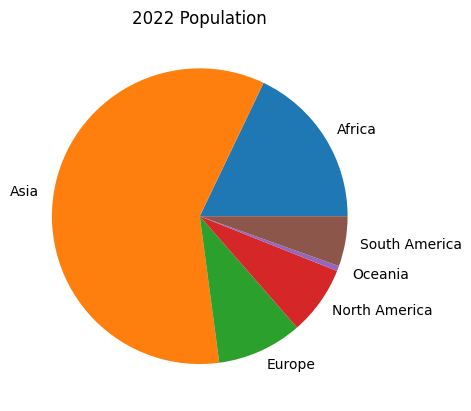

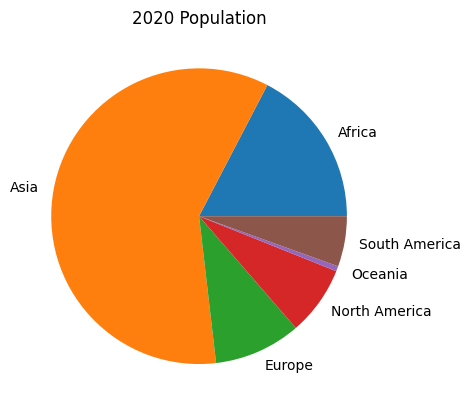

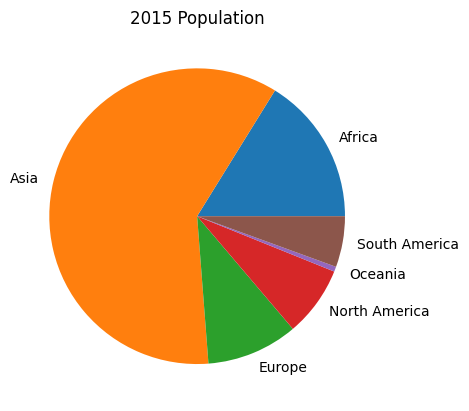

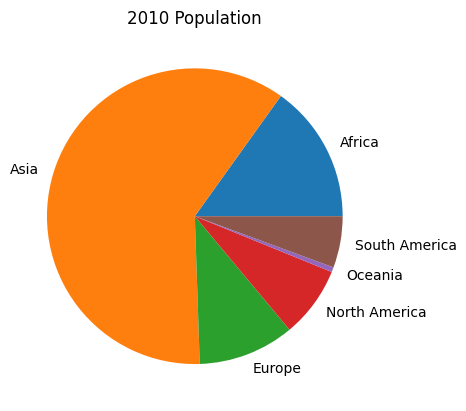

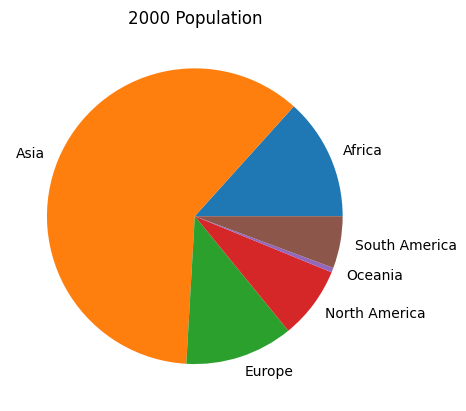

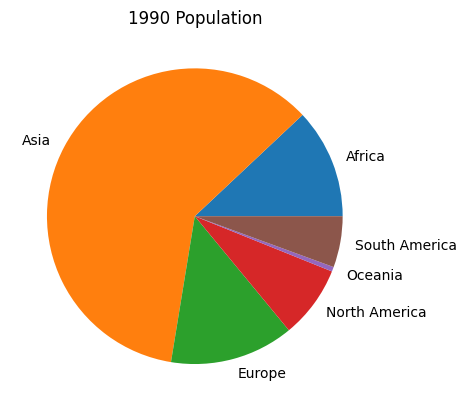

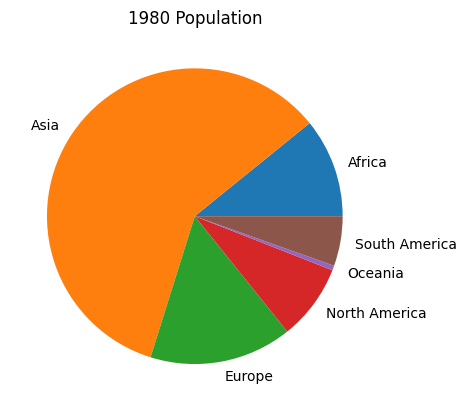

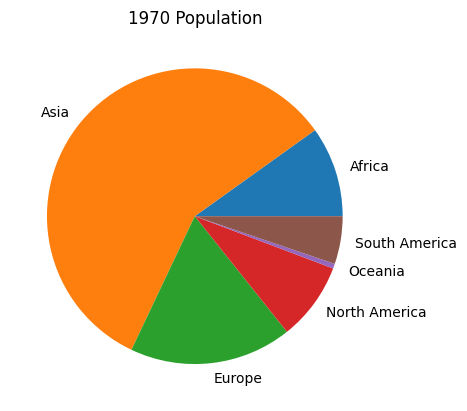

In [33]:
 
# Continent list`s length can be used to create different pie charts so every pie chart contain all continents 
#without repeatation or 
for i in range(len (continent_list['population'])):
    i*=len (Continents)
    if i < len (continent_list['population']):    # to ensure not going beyond the range
        plt.title(continent_list['year'][i])    # title of every pie chart 
        plt.pie(continent_list['population'][i:len (Continents)+i],
        labels=continent_list['continent'][i:len(Continents)+i])
        plt.show()


    

<h3> initial findings</h3>
<p>
after this tremandious work we can say that:-1- Asia is highest population always and oceans are the lowest 
2- more interestingly : africa before 1990 had lower population than europe then Africa started to grow to be more 
 than(europe+north america)
3-farther more , europe was at 1980 double North america, now is almost equal to north America at 2022
</p>

In [ ]:
<h3> debating point</h3>
<p>
However, these findings may be baised  because area of every continent vary 
ex:- may be Africa is larger in size than euro*3  in that case normally they grow faster than euro
Therefore,  next step is to draw lines of density to either support the previous 
conclusion or negate it 
<p>

In [9]:
#resorting the data to draw lines represent the growth of density of each 
data_lines=continent_list.sort_values(by=['continent','population'],ignore_index=True)  
data_lines.head(10)

,continent,year,population,density
0,Africa,1970 Population,365444348,12
1,Africa,1980 Population,481536377,15
2,Africa,1990 Population,638150629,21
3,Africa,2000 Population,818946032,27
4,Africa,2010 Population,1055228072,34
5,Africa,2015 Population,1201102442,39
6,Africa,2020 Population,1360671810,44
7,Africa,2022 Population,1426730932,47
8,Asia,1970 Population,2144906290,66
9,Asia,1980 Population,2635334228,82


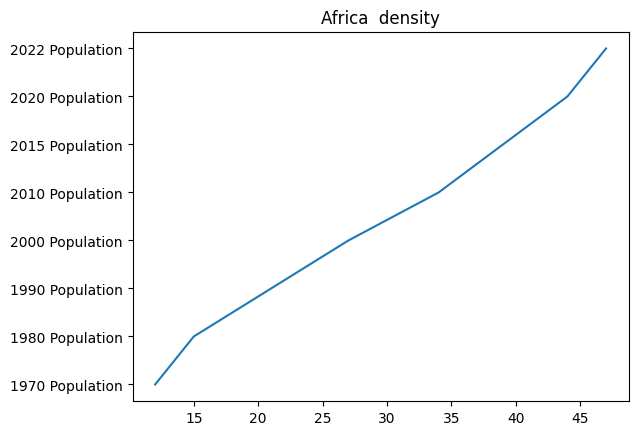

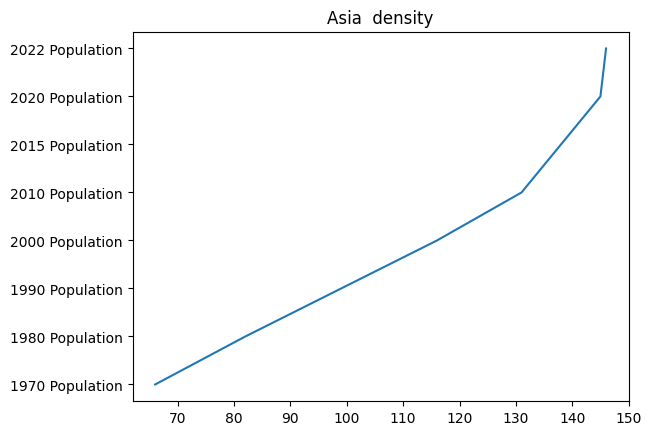

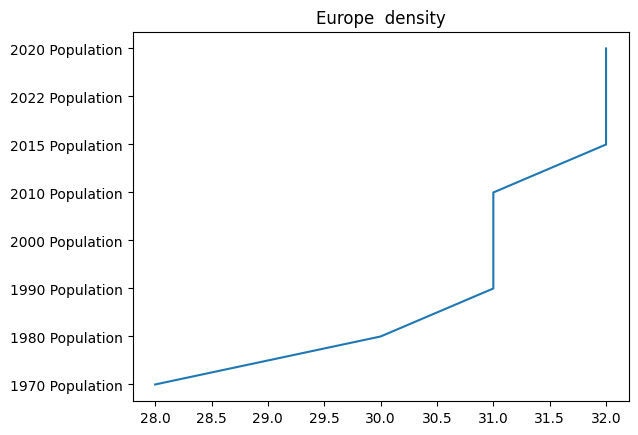

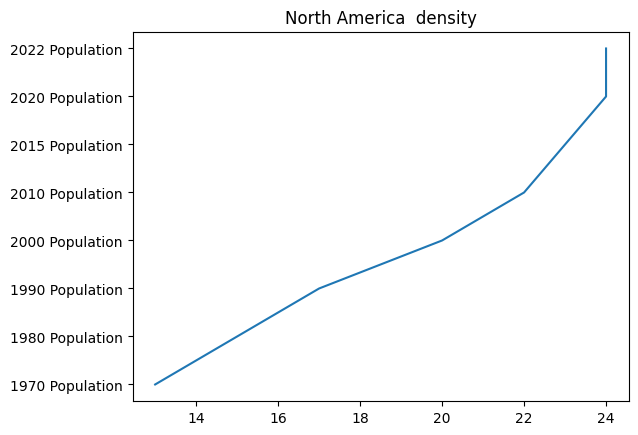

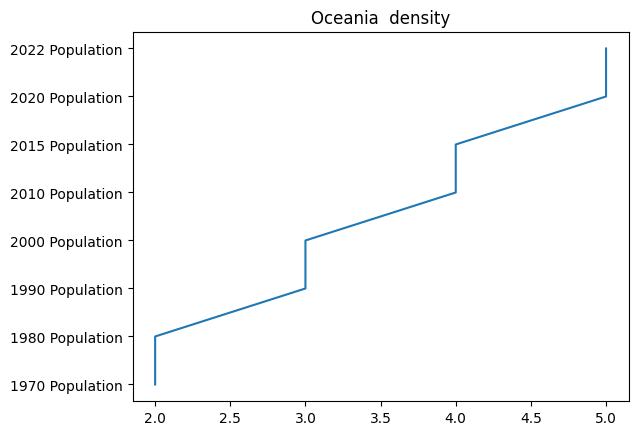

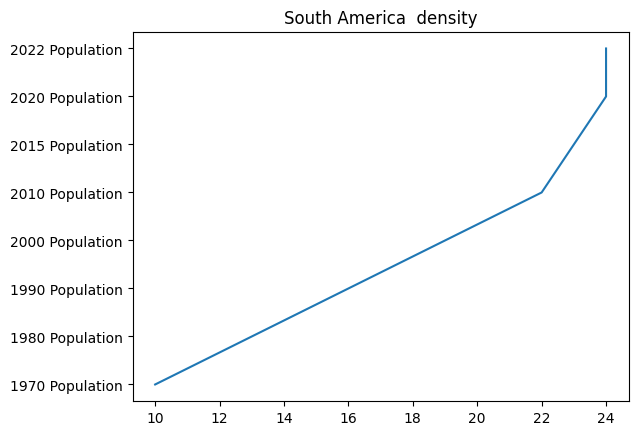

In [23]:
period=8  # 
for j in range(len (data_lines['population'])):
    j*=period 
    if j <len (data_lines['population']):    # to ensure not going beyond the range 
        x=data_lines['density'][j:period+j]
        y=data_lines['year'][j:period+j]
        plt.plot(x,y)
        plt.title(data_lines['continent'][j]+" "+" density")
        plt.show()
    else :
        break


#<h4>Doubts now are confirmed :-</h4>
<ol>
<li>Europe from 1990 to 2010 has no detectable increase in density and same repeated from 2015 to 2022</li>
<li>Africa has linear constatnt increase in density( number of people per km*2) </li>
<li>Asia  doubled their citizens  over the last 50 years from 70/km*2  to 150/km*2</li>
</ol>
<li></li>
<p>
extra finding: Oceans has fixed pattern ( increase by one person/km square ) every 20 years!!!</p>

<h2> final conclusion and findings</h2>
<h5>density and growth rate</h5>
    <p> some continents have  been growing in number of population and density over the last 50 years:-
        Africa showing  highest growth rate  as  increased 4 time  from 12 to 47 
        and if continued  with same rate  soon or late  it will overcome Asian total population.
    
        Asia, Oceans, South, and north America  have same growth rate  as they doubled their population 
        regardless that they all started from  different basic population 
        the lowest growth rate  comes from Europe as they only increased by  1.25%  approximately.
<h5> total population prospective </h5>
    <p> As said before,  Asia is always  highest population  followed  by Africa which surpassed 
    Europe and took its rank. the least continent  is always Oceans. the remaining continents are almost equal</p>

<p>finally: none of the continents showing any decrease  or negative growth rate  which means none of them 
    has indicator of future decrease of total number of population (extenction) this may be because of immigration</p>
        
    

<h3> further ideas for development</h3>
<ul>
<li> studying immigration patterns over same period</li>
<li> examing financial status and specially family funding and maternity support </li>
<li>studying wars and other disasters  over the same period </li>
</ul>
<p> Studying wars and other disasters over the same period,
    which will help in getting more insights and can answer the following questions?:-
    <ol>
    <li>
    does Africa(for example) increase by this high rate or receive immigrants from other continents?
    </li>
     <li>why do Oceans show this low level of population? why this low-density level does not encourage immigration to it? 
        or even citizens to have many children?
    </li>
     <li>
     why is the Europe area showing this lowest growth rate among all of them? Are people leaving Europe ( low growth rate) or a more bleak view that this growth rate represents immigrants to Europe 
    and without them, we can see a negative growth rate ?!</li>
     <li> Does Asia needs more land to alleviate this crowdedness and may start taking lands from others soon?!</li>
    </ol>
</p>

<h3> references and resources</h3>

<ul>
<li>
https://matplotlib.org/ for data visualization 
</li>
<li>
https://pandas.pydata.org/docs/reference/index.html for helping me in dataframes and cleaning data
</li>
<li>https://www.geeksforgeeks.org/line-chart-in-matplotlib-python practical examples of matplotlib </li>
    <li>https://www.kaggle.com/datasets/tanuprabhu/population-by-country-2020/discussion kaggle website datasets</li>
<li>https://population.un.org/wpp/Download/Archive/CSV/ united nation dataset</li>
        </ul>
